### 3.2 Data Collection (0.5 point) 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
%matplotlib inline
import warnings, string
warnings.filterwarnings('ignore')
import wordcloud
from wordcloud import WordCloud
import nltk
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import concurrent.futures
from collections import Counter
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk



[nltk_data] Downloading package wordnet to /Users/admin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/admin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/admin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/admin/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to /Users/admin/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
df = pd.read_csv('Electronics30.csv')
df

,rating,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime
0,5,True,"03 15, 2016",A1N82P7TEJT4CU,B000001ON6,kelly monroe goode,Brand new still in the package,Five Stars,1458000000
1,3,True,"03 15, 2016",ASBAJCQHPVBFA,B000001ON6,Roger Roles,Thanks for replacing it so quickly I just trie...,Thanks for replacing it so quickly I just trie...,1458000000
2,1,True,"03 14, 2016",A2VANT6O13NZ91,B000001ON6,dwreck,There was no liquid in the cleaning bottle.,One Star,1457913600
3,5,True,"03 13, 2016",A30WHZQLI2IZ7M,B000001ON6,michael schield,burned in house fire,Five Stars,1457827200
4,2,True,"03 11, 2016",A2T0MN83BGCMC0,B000001ON6,J. Ames,Why can't they make the current versions like ...,Product decline.,1457654400
...,...,...,...,...,...,...,...,...,...
29995,3,True,"05 30, 2013",ACZ2F796AIKK3,B000023VW2,nhc,I think this antenna does make a improvement i...,used with ETON G6 Shortwave radio,1369872000
29996,5,True,"05 21, 2013",A1O1VQQHOQ7U2E,B000023VW2,Pawan Kumar,I live in a closed apartment. I have put sang...,Wow Product for its use,1369094400
29997,3,True,"05 19, 2013",A4ECXYLWC4AH3,B000023VW2,HWW,"It's so so. I'm getting some improvement, but...",Antenna,1368921600
29998,5,True,"05 8, 2013",A3MPNXY6UKZK4O,B000023VW2,Kindle,Great. I love the storage roll-up system thou...,It's a great antenna,1367971200


### 3.3 Data Pre-processing (0.5 point) 

In [3]:
df.drop('reviewerID',inplace=True,axis=1)
df.drop('asin',inplace=True,axis=1)
df.drop('unixReviewTime',inplace=True,axis=1)

df.head()

,rating,verified,reviewTime,reviewerName,reviewText,summary
0,5,True,"03 15, 2016",kelly monroe goode,Brand new still in the package,Five Stars
1,3,True,"03 15, 2016",Roger Roles,Thanks for replacing it so quickly I just trie...,Thanks for replacing it so quickly I just trie...
2,1,True,"03 14, 2016",dwreck,There was no liquid in the cleaning bottle.,One Star
3,5,True,"03 13, 2016",michael schield,burned in house fire,Five Stars
4,2,True,"03 11, 2016",J. Ames,Why can't they make the current versions like ...,Product decline.


In [4]:
df.isnull().sum()

rating          0
verified        0
reviewTime      0
reviewerName    4
reviewText      5
summary         0
dtype: int64

In [5]:
# Clean the DataFrame
df_cleaned = df.dropna()  # Drop rows with missing values


print("\nCleaned DataFrame:")
df_cleaned



Cleaned DataFrame:


,rating,verified,reviewTime,reviewerName,reviewText,summary
0,5,True,"03 15, 2016",kelly monroe goode,Brand new still in the package,Five Stars
1,3,True,"03 15, 2016",Roger Roles,Thanks for replacing it so quickly I just trie...,Thanks for replacing it so quickly I just trie...
2,1,True,"03 14, 2016",dwreck,There was no liquid in the cleaning bottle.,One Star
3,5,True,"03 13, 2016",michael schield,burned in house fire,Five Stars
4,2,True,"03 11, 2016",J. Ames,Why can't they make the current versions like ...,Product decline.
...,...,...,...,...,...,...
29995,3,True,"05 30, 2013",nhc,I think this antenna does make a improvement i...,used with ETON G6 Shortwave radio
29996,5,True,"05 21, 2013",Pawan Kumar,I live in a closed apartment. I have put sang...,Wow Product for its use
29997,3,True,"05 19, 2013",HWW,"It's so so. I'm getting some improvement, but...",Antenna
29998,5,True,"05 8, 2013",Kindle,Great. I love the storage roll-up system thou...,It's a great antenna


In [6]:
df_cleaned['reviewTime'] = pd.to_datetime(df['reviewTime'])  # Convert 'reviewTime' to datetime
df_cleaned.head()

,rating,verified,reviewTime,reviewerName,reviewText,summary
0,5,True,2016-03-15,kelly monroe goode,Brand new still in the package,Five Stars
1,3,True,2016-03-15,Roger Roles,Thanks for replacing it so quickly I just trie...,Thanks for replacing it so quickly I just trie...
2,1,True,2016-03-14,dwreck,There was no liquid in the cleaning bottle.,One Star
3,5,True,2016-03-13,michael schield,burned in house fire,Five Stars
4,2,True,2016-03-11,J. Ames,Why can't they make the current versions like ...,Product decline.


In [7]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29991 entries, 0 to 29999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   rating        29991 non-null  int64         
 1   verified      29991 non-null  bool          
 2   reviewTime    29991 non-null  datetime64[ns]
 3   reviewerName  29991 non-null  object        
 4   reviewText    29991 non-null  object        
 5   summary       29991 non-null  object        
dtypes: bool(1), datetime64[ns](1), int64(1), object(3)
memory usage: 1.4+ MB


### 3.4 Data Transformation (0.5 point) 

In [8]:
## Frequency Words
words = Counter(' '.join(df_cleaned['reviewText'].to_list()).split())
Frequency_words = pd.DataFrame([words]).transpose().reset_index().rename(columns = {'index': 'Words', 0:'Frequency' })
Frequency_words = Frequency_words.sort_values('Frequency',ascending=False).reset_index(drop='index').reset_index().rename(columns={'index':'Rank'})
Frequency_words['Rank'] = Frequency_words['Rank'].apply(lambda x : x+1)
Frequency_words.head(20)

,Rank,Words,Frequency
0,1,the,86910
1,2,I,58094
2,3,and,52069
3,4,to,49612
4,5,a,47792
5,6,is,29087
6,7,of,28621
7,8,for,27223
8,9,it,24966
9,10,in,19612


In [9]:
def text_process(reviewText):
    nopunc = [char for char in reviewText if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])


In [10]:
# Display the original text
original_text = df['reviewText'][0]
print("Original Text:")
print(original_text)

# Clean the text using the clean_text function
cleaned_text = text_process(original_text)
print("\nCleaned Text:")
cleaned_text

Original Text:
Brand new still in the package

Cleaned Text:


'Brand new still package'

In [11]:
# Assuming 'reviewText' is the correct column name
df_cleaned['reviewText'] = df_cleaned['reviewText'].apply(text_process)

In [12]:
df_cleaned['reviewText'] = df_cleaned['reviewText'].astype(str)

In [13]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(reviewText):
    return ' '.join([lemmatizer.lemmatize(word) for word in reviewText.split()])
df_cleaned["reviewText"] = df_cleaned["reviewText"].apply(lambda reviewText: lemmatize_words(reviewText))

In [14]:
df_cleaned['reviewText'].head()

0                              Brand new still package
1    Thanks replacing quickly tried today couldnt g...
2                               liquid cleaning bottle
3                                    burned house fire
4    cant make current version like making number y...
Name: reviewText, dtype: object

In [15]:
rare_words = pd.Series(' '.join(df_cleaned['reviewText']).split()).value_counts()[-10:]
print("\nRARE WORDS:")
print(rare_words)


RARE WORDS:
gunshy                                                                                  1
pausedstopped                                                                           1
commericial                                                                             1
MBps                                                                                    1
RJ45MRJ45Manbspthat                                                                     1
CAT6                                                                                    1
href50FTCAT6BlackPatchCableSnaglessRJ45MRJ45MdpB000CNBQASrefcmcrarpdrvwtxtieUTF850FT    1
R45                                                                                     1
superstores                                                                             1
heckuva                                                                                 1
dtype: int64


In [16]:
# Remove common and rare words
common = pd.Series(' '.join(df_cleaned['reviewText']).split()).value_counts()[:10]
common = list(common.index)
df_cleaned['reviewText'] = df_cleaned['reviewText'].apply(lambda i: " ".join(i for i in i.split() if i not in common))

rare = pd.Series(' '.join(df_cleaned['reviewText']).split()).value_counts()[-10:]
rare = list(rare.index)
df_cleaned['reviewText'] = df_cleaned['reviewText'].apply(lambda i: " ".join(i for i in i.split() if i not in rare))
df_cleaned['reviewText'][0]

'Brand new still package'

In [17]:
common

['headphone',
 'sound',
 'good',
 'great',
 'use',
 'one',
 'work',
 'quality',
 'like',
 'get']

In [18]:
# Tokenize words in the 'review_text' column using NLTK's word_tokenize
tokenized_reviews = df_cleaned['reviewText'].apply(word_tokenize)
tokenized_reviews.head()

0                         [Brand, new, still, package]
1    [Thanks, replacing, quickly, tried, today, cou...
2                           [liquid, cleaning, bottle]
3                                [burned, house, fire]
4    [cant, make, current, version, making, number,...
Name: reviewText, dtype: object

In [19]:
df_cleaned.head()

,rating,verified,reviewTime,reviewerName,reviewText,summary
0,5,True,2016-03-15,kelly monroe goode,Brand new still package,Five Stars
1,3,True,2016-03-15,Roger Roles,Thanks replacing quickly tried today couldnt l...,Thanks for replacing it so quickly I just trie...
2,1,True,2016-03-14,dwreck,liquid cleaning bottle,One Star
3,5,True,2016-03-13,michael schield,burned house fire,Five Stars
4,2,True,2016-03-11,J. Ames,cant make current version making number year a...,Product decline.


In [20]:
import pandas as pd

# Assuming df_cleaned is your DataFrame

# Creating the "Genuine_or_Fake" column for the entire dataset
df_cleaned['Genuine_or_Fake'] = df_cleaned['verified'].apply(lambda x: 'Genuine' if x else 'Yet to Classify')

# Displaying the shape of the resulting dataset
print("Entire Dataset Shape:", df_cleaned.shape)

# Displaying the first few rows of the DataFrame to check the new column
df_cleaned.head()


Entire Dataset Shape: (29991, 7)


,rating,verified,reviewTime,reviewerName,reviewText,summary,Genuine_or_Fake
0,5,True,2016-03-15,kelly monroe goode,Brand new still package,Five Stars,Genuine
1,3,True,2016-03-15,Roger Roles,Thanks replacing quickly tried today couldnt l...,Thanks for replacing it so quickly I just trie...,Genuine
2,1,True,2016-03-14,dwreck,liquid cleaning bottle,One Star,Genuine
3,5,True,2016-03-13,michael schield,burned house fire,Five Stars,Genuine
4,2,True,2016-03-11,J. Ames,cant make current version making number year a...,Product decline.,Genuine


In [21]:
# Assuming df_cleaned is your DataFrame
# Creating the "Genuine_or_Fake" column for the entire dataset
df_cleaned['Genuine_or_Fake'] = df_cleaned['verified'].apply(lambda x: 'Genuine' if x else 'Yet to Classify')

# Apply sentiment analysis to review text
sia = SentimentIntensityAnalyzer()
df_cleaned['sentiment_score'] = df_cleaned['reviewText'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Calculate the number of reviews per reviewer
reviewer_counts = df_cleaned['reviewerName'].value_counts()
df_cleaned['unusual_reviewer'] = df_cleaned['reviewerName'].apply(lambda x: reviewer_counts[x] if x in reviewer_counts else 0)

# Calculate the length of each review
df_cleaned['review_length'] = df_cleaned['reviewText'].apply(len)

# Define a list of suspicious words
suspicious_words = ['fake', 'scam', 'fraud']
df_cleaned['suspicious_words'] = df_cleaned['reviewText'].apply(lambda x: any(word in x.lower() for word in suspicious_words))

# Assuming 'Genuine_or_Fake' is the target column
train_data = df_cleaned[['sentiment_score', 'unusual_reviewer', 'review_length', 'suspicious_words', 'Genuine_or_Fake']]

# Split the data into features (X) and labels (y)
X_train = train_data[['sentiment_score', 'unusual_reviewer', 'review_length', 'suspicious_words']]
y_train = train_data['Genuine_or_Fake']

# Train a logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Use the trained model to predict the labels for 'Yet to Classify' rows
X_yet_to_classify = df_cleaned[df_cleaned['Genuine_or_Fake'] == 'Yet to Classify'][['sentiment_score', 'unusual_reviewer', 'review_length', 'suspicious_words']]
predictions = model.predict(X_yet_to_classify)

# Replace 'Yet to Classify' with 'Fake' in the 'Predicted_Genuine_or_Fake' column
df_cleaned.loc[df_cleaned['Genuine_or_Fake'] == 'Yet to Classify', 'FINAL_Genuine_or_Fake'] = predictions

# Set 'Fake' if prediction is 'Yet to Classify'
df_cleaned.loc[df_cleaned['FINAL_Genuine_or_Fake'] == 'Yet to Classify', 'FINAL_Genuine_or_Fake'] = 'Fake'

# Set 'Genuine' for rows where 'Genuine_or_Fake' is 'Genuine'
df_cleaned.loc[df_cleaned['Genuine_or_Fake'] == 'Genuine', 'FINAL_Genuine_or_Fake'] = 'Genuine'

# Display the resulting DataFrame with predictions
print("Rows with Predictions:")
print(df_cleaned[['reviewText', 'Genuine_or_Fake', 'FINAL_Genuine_or_Fake']])


Rows with Predictions:
                                              reviewText Genuine_or_Fake  \
0                                Brand new still package         Genuine   
1      Thanks replacing quickly tried today couldnt l...         Genuine   
2                                 liquid cleaning bottle         Genuine   
3                                      burned house fire         Genuine   
4      cant make current version making number year a...         Genuine   
...                                                  ...             ...   
29995  think antenna make improvement reception time ...         Genuine   
29996  live closed apartment put sangean ANT60 short ...         Genuine   
29997  Im getting improvement nothing major probably ...         Genuine   
29998  Great love storage rollup system though bulky ...         Genuine   
29999  purchase helper even antenna help signal cours...         Genuine   

      FINAL_Genuine_or_Fake  
0                   Genuine  
1   

In [22]:
df_cleaned.head()

,rating,verified,reviewTime,reviewerName,reviewText,summary,Genuine_or_Fake,sentiment_score,unusual_reviewer,review_length,suspicious_words,FINAL_Genuine_or_Fake
0,5,True,2016-03-15,kelly monroe goode,Brand new still package,Five Stars,Genuine,0.0000,1,23,False,Genuine
1,3,True,2016-03-15,Roger Roles,Thanks replacing quickly tried today couldnt l...,Thanks for replacing it so quickly I just trie...,Genuine,0.4404,1,64,False,Genuine
2,1,True,2016-03-14,dwreck,liquid cleaning bottle,One Star,Genuine,0.0000,1,22,False,Genuine
3,5,True,2016-03-13,michael schield,burned house fire,Five Stars,Genuine,-0.3400,1,17,False,Genuine
4,2,True,2016-03-11,J. Ames,cant make current version making number year a...,Product decline.,Genuine,0.4456,1,207,False,Genuine


In [23]:
false_verified_rows = df_cleaned[df_cleaned['verified'] == False]
false_verified_rows.head()


,rating,verified,reviewTime,reviewerName,reviewText,summary,Genuine_or_Fake,sentiment_score,unusual_reviewer,review_length,suspicious_words,FINAL_Genuine_or_Fake
18,5,False,2009-02-12,Zapple73,bought brand tape year make DBX II recording p...,Nothing Better Than Maxell,Yet to Classify,0.0000,1,66,False,Genuine
19,1,False,2008-06-27,Floyd L. Smith,consistently poor experience Maxell XLii 90 Hi...,"Fine tape, poor mechanism",Yet to Classify,-0.9337,1,627,False,Genuine
20,5,False,2008-06-26,William J. Driscoll Jr.,3 per tape including shipping charge 5pack per...,Best tape,Yet to Classify,0.6705,1,469,False,Genuine
22,4,False,2008-04-30,Matthew G. Sherwin,Maxell manufacture excellent Xlii high bias 90...,fine high bias 90 minute cassette tape--with j...,Yet to Classify,0.9927,4,1736,False,Fake
23,5,False,2007-12-23,DJ.L,Im noticing day age cd format mp3 downloading ...,The Best For The Job.,Yet to Classify,0.9274,1,394,False,Genuine


In [24]:
predicted_stats = df_cleaned[df_cleaned['verified'] == False]['FINAL_Genuine_or_Fake'].value_counts()
print(predicted_stats)


Genuine    6522
Fake        814
Name: FINAL_Genuine_or_Fake, dtype: int64


In [25]:
df_cleaned.head()

,rating,verified,reviewTime,reviewerName,reviewText,summary,Genuine_or_Fake,sentiment_score,unusual_reviewer,review_length,suspicious_words,FINAL_Genuine_or_Fake
0,5,True,2016-03-15,kelly monroe goode,Brand new still package,Five Stars,Genuine,0.0000,1,23,False,Genuine
1,3,True,2016-03-15,Roger Roles,Thanks replacing quickly tried today couldnt l...,Thanks for replacing it so quickly I just trie...,Genuine,0.4404,1,64,False,Genuine
2,1,True,2016-03-14,dwreck,liquid cleaning bottle,One Star,Genuine,0.0000,1,22,False,Genuine
3,5,True,2016-03-13,michael schield,burned house fire,Five Stars,Genuine,-0.3400,1,17,False,Genuine
4,2,True,2016-03-11,J. Ames,cant make current version making number year a...,Product decline.,Genuine,0.4456,1,207,False,Genuine


### 3.5 Data Preparation (0.5 point) 

In [26]:
train_df, temp_df = train_test_split(df_cleaned, test_size=0.3, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

# Display the shapes of the resulting sets
print("Training Set Shape:", train_df.shape)
print("Validation Set Shape:", val_df.shape)
print("Testing Set Shape:", test_df.shape)

Training Set Shape: (20993, 12)
Validation Set Shape: (4499, 12)
Testing Set Shape: (4499, 12)


In [27]:
train_shape = train_df.shape
train_shape

(20993, 12)

In [28]:
train_df.head()

,rating,verified,reviewTime,reviewerName,reviewText,summary,Genuine_or_Fake,sentiment_score,unusual_reviewer,review_length,suspicious_words,FINAL_Genuine_or_Fake
27935,5,True,2013-02-13,Amazon Customer,Good thing High flat better higher priced comf...,The best quality/price headphones ever,Genuine,0.8316,1563,192,True,Genuine
11628,5,False,2000-01-22,Noah Green,Theres reason camera popular site ever need di...,Perfect For Beginners and Normal Users,Yet to Classify,0.7269,1,422,False,Genuine
10915,5,True,2013-04-17,Ken,screw tighten plug feel cheap cable fine Im us...,Works just fine,Genuine,0.1027,20,83,False,Genuine
19012,5,True,2018-01-05,gayle knighten,Loved,Five Stars,Genuine,0.5994,1,5,False,Genuine
20689,3,False,2015-05-31,Lakshya,Confused title rating Let start saying best po...,Best Headphones I've Ever Used,Yet to Classify,0.4756,1,368,False,Genuine


In [29]:
val_shape = val_df.shape
val_shape

(4499, 12)

In [30]:
val_df.head()

,rating,verified,reviewTime,reviewerName,reviewText,summary,Genuine_or_Fake,sentiment_score,unusual_reviewer,review_length,suspicious_words,FINAL_Genuine_or_Fake
12536,4,False,1999-12-28,Donald R. Brown,purchased Toshiba 3109 DVD player month ago ea...,Very nice but a few improvements would have ea...,Yet to Classify,0.9845,1,1266,False,Fake
15956,1,True,2015-05-03,Bonnie Phillippi,didnt even better antenna,nt work even with a better,Genuine,-0.3412,1,25,False,Genuine
2943,5,True,2017-03-29,Jaeloe,replaced two shower head house model wonderful...,Wonderful - Best Bang For the Buck!,Genuine,0.8750,1,108,False,Genuine
6292,5,True,2018-01-10,Gabriela Flores,Good product,Five Stars,Genuine,0.4404,1,12,False,Genuine
13907,5,True,2017-12-02,Me Ma 11,Perfect label maker,Just what I needed for my label maker,Genuine,0.5719,1,19,False,Genuine


In [31]:
test_shape = test_df.shape
test_shape


(4499, 12)

In [32]:
test_df.head()

,rating,verified,reviewTime,reviewerName,reviewText,summary,Genuine_or_Fake,sentiment_score,unusual_reviewer,review_length,suspicious_words,FINAL_Genuine_or_Fake
3635,4,True,2015-03-09,The Blackadder,,Four Stars,Genuine,0.0000,1,0,False,Genuine
16222,5,True,2016-08-05,John B.,Great Antenna well packaged carefully packaged...,"Easy to use, and install. Package dezined to a...",Genuine,0.3182,5,74,False,Genuine
1453,5,True,2007-06-26,Harmony1,received radio gift Fathers Day reception look...,Love the radio,Genuine,0.6597,1,56,False,Genuine
13415,5,False,1999-11-28,Alexander Paulsen,lip sync trouble best picture DVD player audit...,Had mine for a week now,Yet to Classify,0.9842,1,839,False,Fake
21589,4,False,2007-06-27,C. Martello,Koss Plug earbuds fixed problem standard iPod ...,Good sports earbud for the money,Yet to Classify,0.7269,1,199,False,Genuine


### 3.6 Data Statistics (0.5 point) 

### Graph before cleaning raw dataset

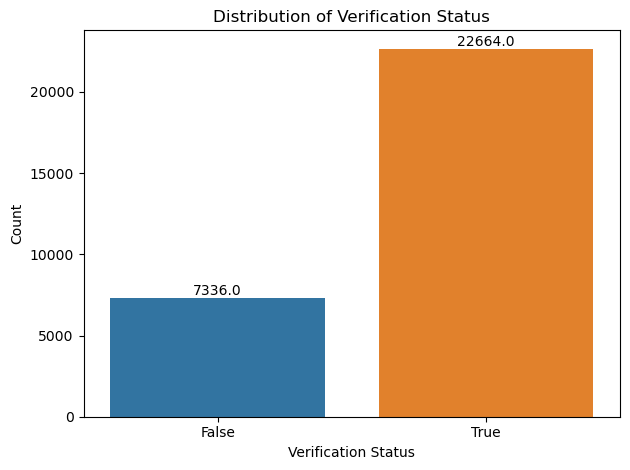

In [33]:

# Create the countplot
ax = sns.countplot(x='verified', data=df)

# Add count values on top of each bar with some spacing
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Set plot title and labels
plt.title('Distribution of Verification Status')
plt.xlabel('Verification Status')
plt.ylabel('Count')

# Adjust layout to avoid clipping of text
plt.tight_layout()

# Show the plot
plt.show()

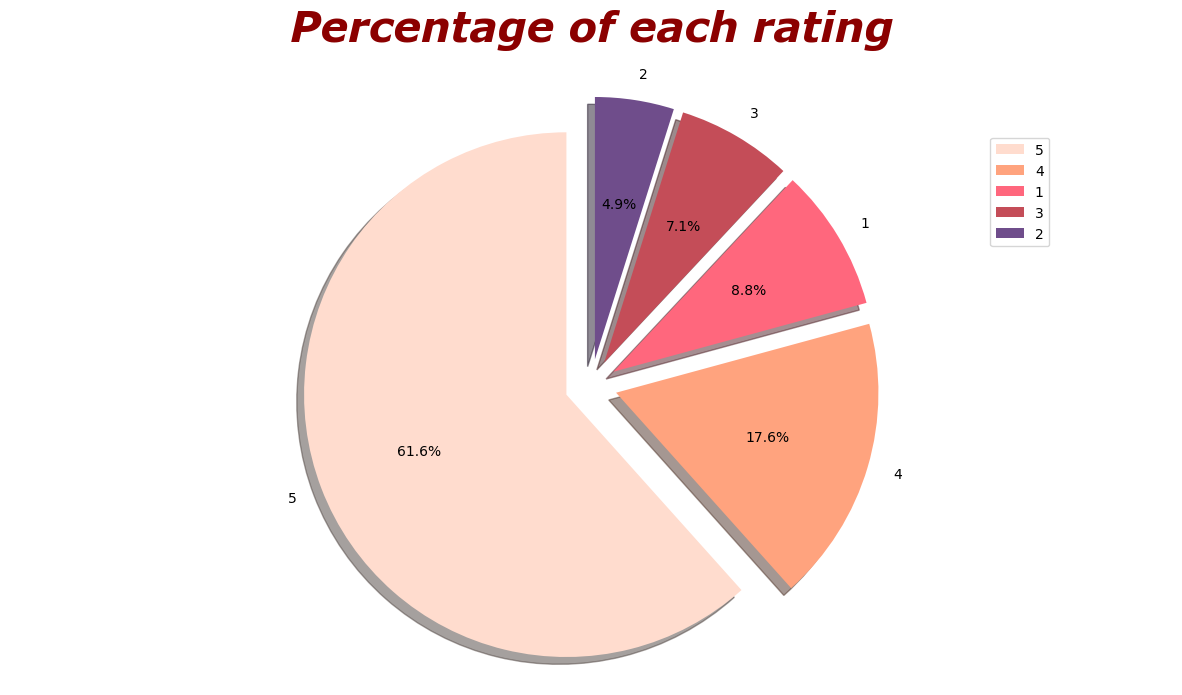

In [34]:
plt.figure(figsize=(15, 8))

# Assuming 'rating' is the column you want to analyze
rating_counts = df['rating'].value_counts()

# Define colors and explode
colors = ['#FFDCCE', '#FFA37E', '#FF677D', '#C44D58', '#6F4D8B']
explode = (0.1, 0.1, 0.1, 0.1, 0.1)  # Modified explode values for each portion

plt.pie(rating_counts, explode=explode, labels=rating_counts.index, colors=colors,
        autopct='%1.1f%%', startangle=90, shadow=True)

# Set custom font for the title
title_font = font_manager.FontProperties(family='Verdana', style='italic', weight='bold', size=30)
plt.title('Percentage of each rating', fontproperties=title_font, pad=20, color='darkred')  # Adjusted color and appearance
plt.ylabel('')  # Remove the y-axis label

# Add legend
plt.legend(rating_counts.index, loc="best", bbox_to_anchor=(0.9, 0.9))

plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular
plt.show()


### Graph after cleaning raw dataset

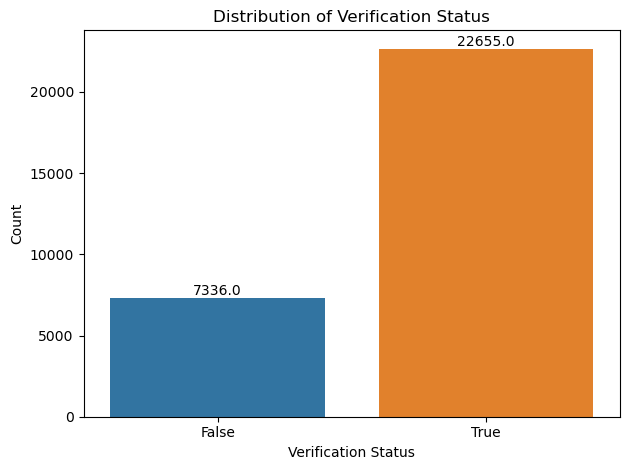

In [35]:
# Create the countplot
ax = sns.countplot(x='verified', data=df_cleaned)

# Add count values on top of each bar with some spacing
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Set plot title and labels
plt.title('Distribution of Verification Status')
plt.xlabel('Verification Status')
plt.ylabel('Count')

# Adjust layout to avoid clipping of text
plt.tight_layout()

# Show the plot
plt.show()


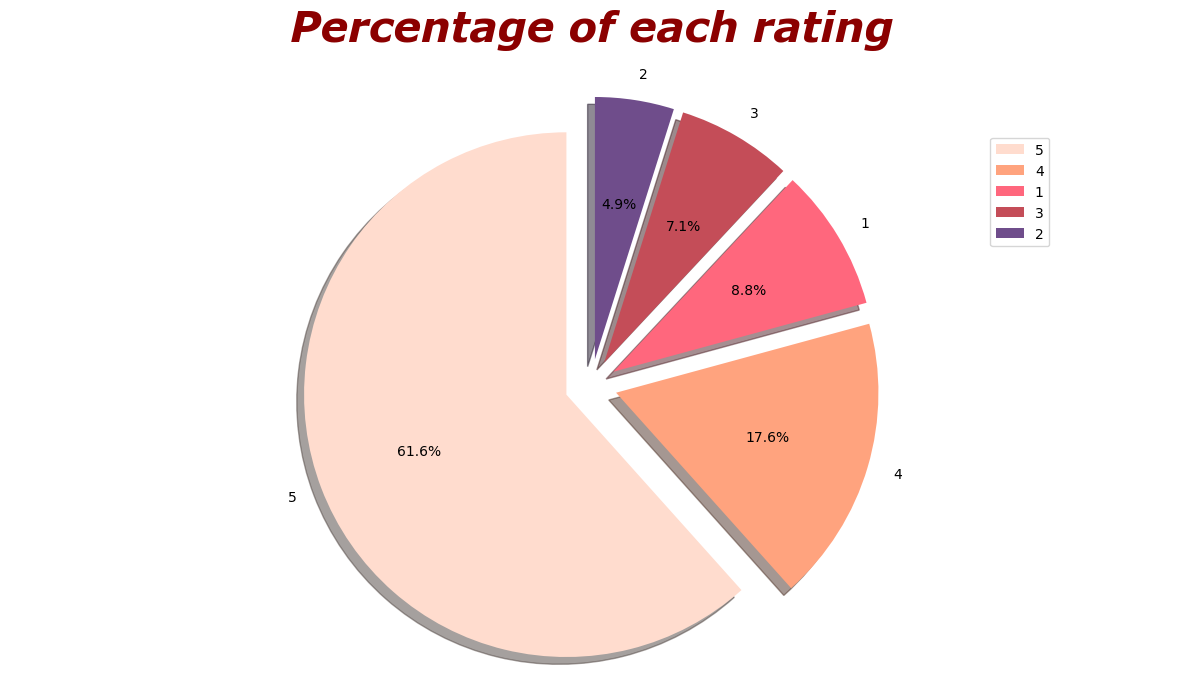

In [36]:
plt.figure(figsize=(15, 8))

# Assuming 'rating' is the column you want to analyze
rating_counts = df_cleaned['rating'].value_counts()

# Define colors and explode
colors = ['#FFDCCE', '#FFA37E', '#FF677D', '#C44D58', '#6F4D8B']
explode = (0.1, 0.1, 0.1, 0.1, 0.1)  # Modified explode values for each portion

plt.pie(rating_counts, explode=explode, labels=rating_counts.index, colors=colors,
        autopct='%1.1f%%', startangle=90, shadow=True)

# Set custom font for the title
title_font = font_manager.FontProperties(family='Verdana', style='italic', weight='bold', size=30)
plt.title('Percentage of each rating', fontproperties=title_font, pad=20, color='darkred')  # Adjusted color and appearance
plt.ylabel('')  # Remove the y-axis label

# Add legend
plt.legend(rating_counts.index, loc="best", bbox_to_anchor=(0.9, 0.9))

plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular
plt.show()


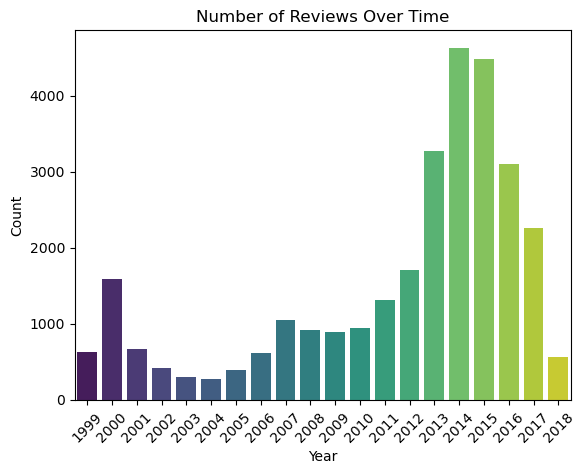

In [37]:
df_cleaned['reviewTime'] = pd.to_datetime(df['reviewTime'])
df_cleaned['Year'] = df_cleaned['reviewTime'].dt.to_period('Y')

# Sort the DataFrame based on the 'Year' column
df_sorted = df_cleaned.sort_values(by='Year')

# Create the count plot
sns.countplot(x='Year', data=df_sorted, palette='viridis')
plt.title('Number of Reviews Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


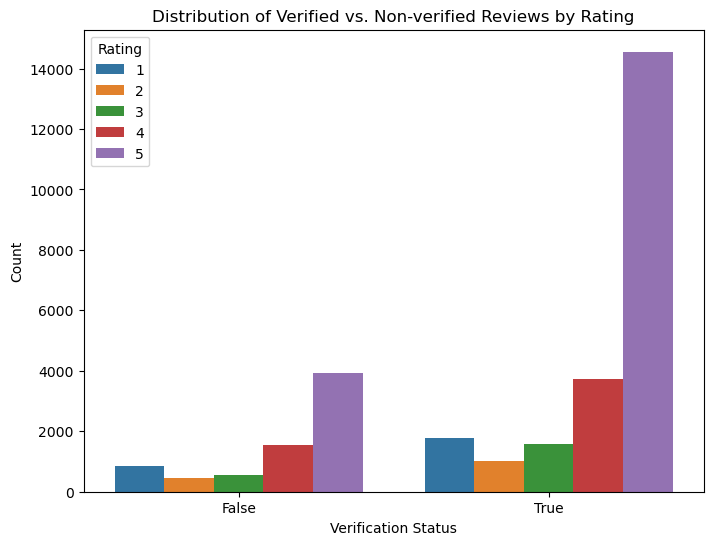

In [38]:
plt.figure(figsize=(8, 6))
sns.countplot(x='verified', data=df_cleaned, hue='rating')
plt.title('Distribution of Verified vs. Non-verified Reviews by Rating')
plt.xlabel('Verification Status')
plt.ylabel('Count')
plt.legend(title='Rating')
plt.show()

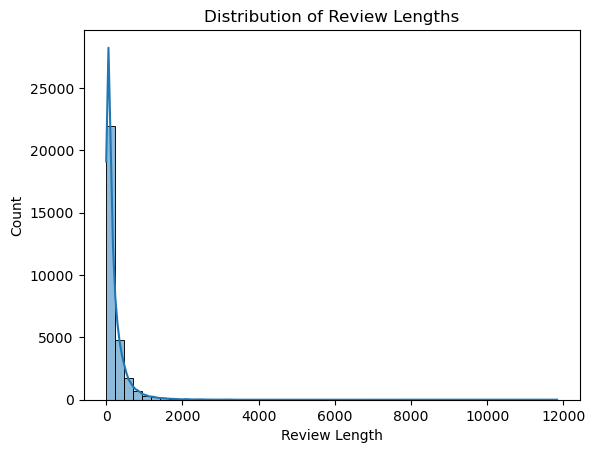

In [39]:
df_cleaned['review_length'] = df_cleaned['reviewText'].apply(len)
sns.histplot(df_cleaned['review_length'], bins=50, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Count')
plt.show()


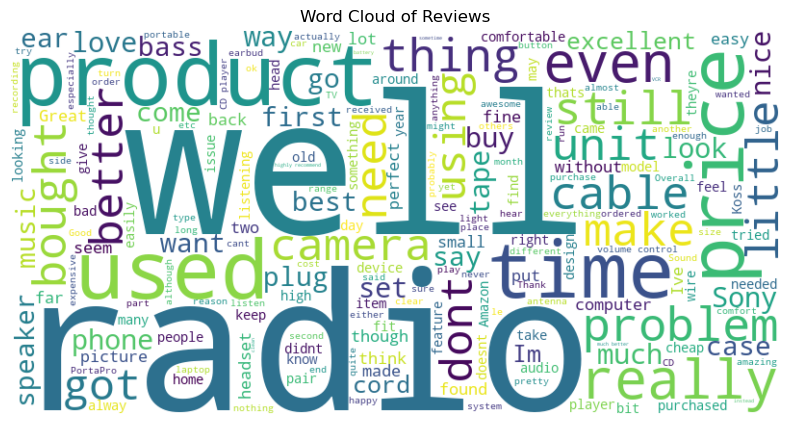

In [40]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df_cleaned['reviewText']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()


### Graph after transformation

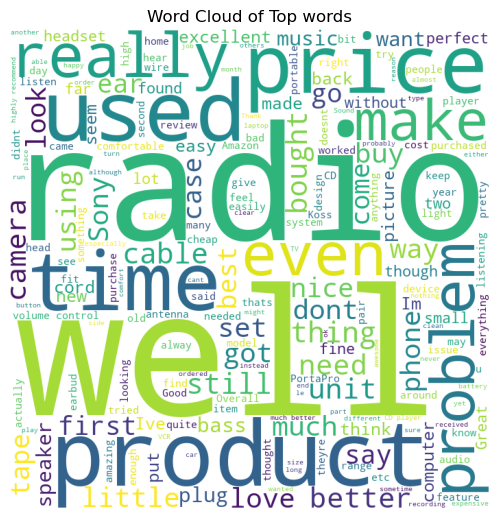

In [41]:
# Check and display top common words using WordCloud
words = '' 
for i in df_cleaned["reviewText"]: 
    tokens = i.split()   
    words += " ".join(tokens)+" "

word_cloud = WordCloud(width=700, height=700, 
                       background_color='white', 
                       min_font_size=10).generate(words) 
plt.figure(figsize=(5, 5)) 
plt.imshow(word_cloud) 
plt.axis("off") 
plt.title('Word Cloud of Top words')
plt.tight_layout(pad=0) 

plt.show()

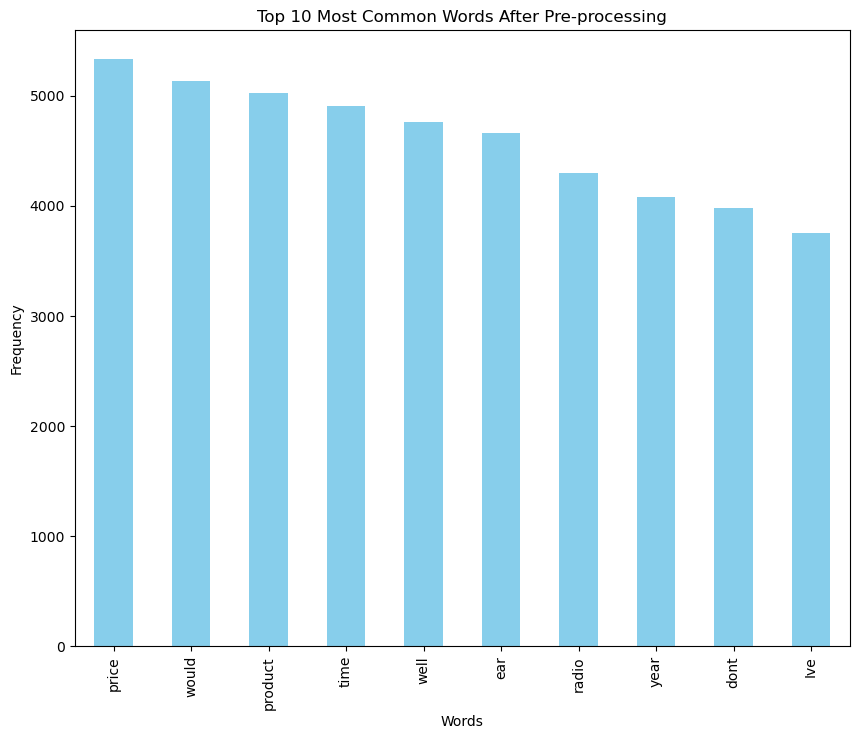

In [42]:
top_words = pd.Series(' '.join(df_cleaned['reviewText']).split()).value_counts()[:10]
plt.figure(figsize=(10, 8))
top_words.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Common Words After Pre-processing')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()


### Graph with Training,Testing and validation dataset 


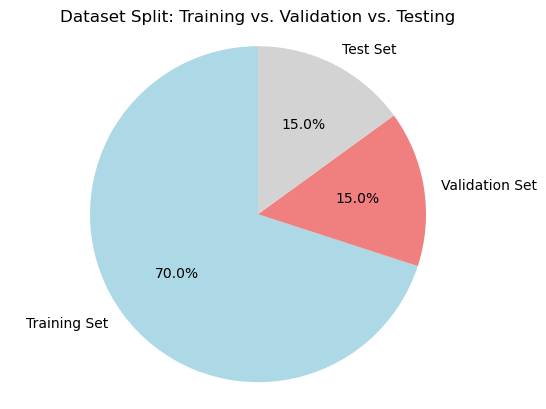

In [43]:
import matplotlib.pyplot as plt

train_set_length = 70
val_set_length = 15
test_set_length = 15

# Data for the graph
labels = ['Training Set', 'Validation Set', 'Test Set']
sizes = [train_set_length, val_set_length,test_set_length]
colors = ['lightblue', 'lightcoral','lightgrey' ]

# Plotting the graph
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Dataset Split: Training vs. Validation vs. Testing')
plt.show()


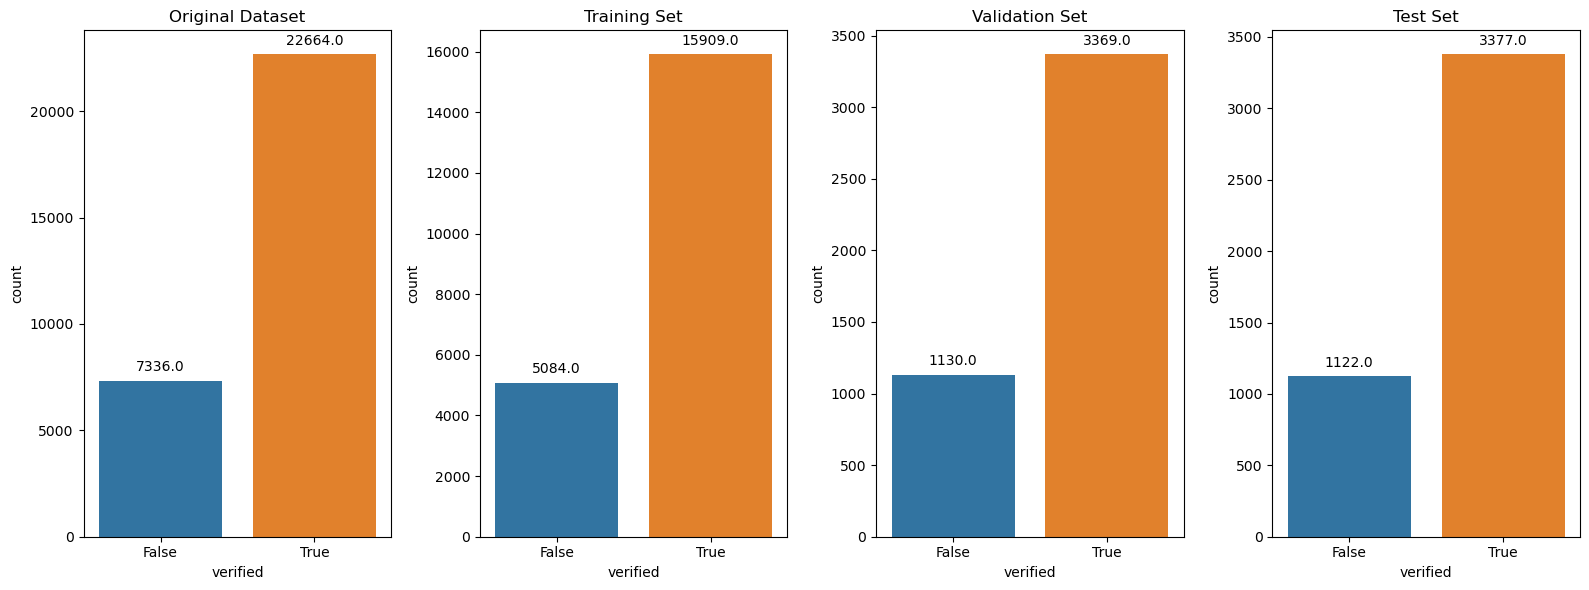

In [44]:
# Plotting the subplots
plt.figure(figsize=(16, 6))

# Original Dataset
plt.subplot(1, 4, 1)
ax = sns.countplot(x='verified', data=df)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Original Dataset')

# Training Set
plt.subplot(1, 4, 2)
ax = sns.countplot(x='verified', data=train_df)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Training Set')

# Validation Set
plt.subplot(1, 4, 3)
ax = sns.countplot(x='verified', data=val_df)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Validation Set')

# Test Set
plt.subplot(1, 4, 4)
ax = sns.countplot(x='verified', data=test_df)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Test Set')

plt.tight_layout()
plt.show()

## MODELS

In [45]:

# Split the training data into features (X_train) and labels (y_train)
X_train = train_df[['sentiment_score', 'unusual_reviewer', 'review_length', 'suspicious_words']]
y_train = train_df['FINAL_Genuine_or_Fake']

# Split the validation data into features (X_val) and labels (y_val)
X_val = val_df[['sentiment_score', 'unusual_reviewer', 'review_length', 'suspicious_words']]
y_val = val_df['FINAL_Genuine_or_Fake']

# Split the testing data into features (X_test) and labels (y_test)
X_test = test_df[['sentiment_score', 'unusual_reviewer', 'review_length', 'suspicious_words']]
y_test = test_df['FINAL_Genuine_or_Fake']



In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score, classification_report

# Define hyperparameter grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2']}

# Create logistic regression model
logistic_model = LogisticRegression(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring=make_scorer(accuracy_score))
grid_search.fit(X_train, y_train)

# Get best hyperparameters
best_params = grid_search.best_params_

# Initialize the logistic regression model with the best hyperparameters
best_logistic_model = LogisticRegression(random_state=42, **best_params)

# Train the model on the training data
best_logistic_model.fit(X_train, y_train)

# Predict labels for the validation set
y_val_pred = best_logistic_model.predict(X_val)

# Evaluate the model on the validation set
accuracy_val = accuracy_score(y_val, y_val_pred)
classification_report_val = classification_report(y_val, y_val_pred)

# Print the evaluation metrics
print("Best Hyperparameters:", best_params)
print("Validation Accuracy with Tuned Hyperparameters:", accuracy_val)
print("Classification Report for Validation Set:")
print(classification_report_val)

# Predict labels for the test set
y_test_pred = best_logistic_model.predict(X_test)

# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
classification_report_test = classification_report(y_test, y_test_pred)

# Print the evaluation metrics for the test set
print("Test Accuracy with Tuned Hyperparameters:", accuracy_test)
print("Classification Report for Test Set:")
print(classification_report_test)


Best Hyperparameters: {'C': 1, 'penalty': 'l2'}
Validation Accuracy with Tuned Hyperparameters: 0.9673260724605468
Classification Report for Validation Set:
              precision    recall  f1-score   support

        Fake       0.50      0.18      0.26       147
     Genuine       0.97      0.99      0.98      4352

    accuracy                           0.97      4499
   macro avg       0.74      0.59      0.62      4499
weighted avg       0.96      0.97      0.96      4499

Test Accuracy with Tuned Hyperparameters: 0.9751055790175595
Classification Report for Test Set:
              precision    recall  f1-score   support

        Fake       0.48      0.29      0.36       109
     Genuine       0.98      0.99      0.99      4390

    accuracy                           0.98      4499
   macro avg       0.73      0.64      0.68      4499
weighted avg       0.97      0.98      0.97      4499



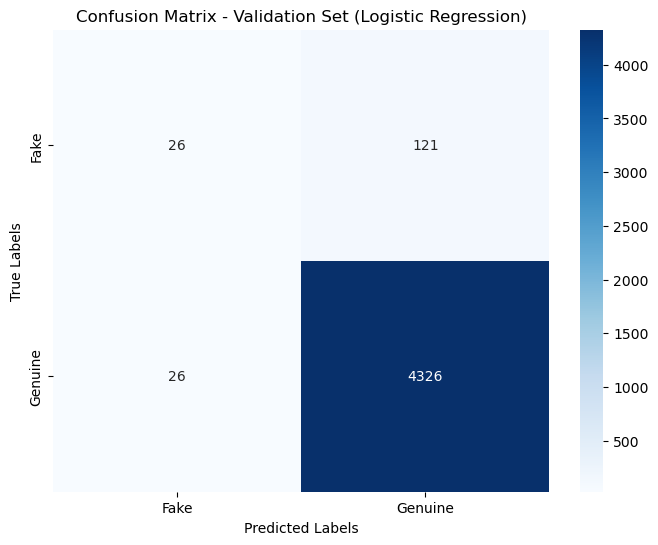

In [47]:
# Assuming you have trained a logistic regression model and made predictions on the validation set
y_val_pred_logistic = best_logistic_model.predict(X_val)

# Compute the confusion matrix
conf_matrix_val_logistic = confusion_matrix(y_val, y_val_pred_logistic)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_val_logistic, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Genuine'], yticklabels=['Fake', 'Genuine'])
plt.title('Confusion Matrix - Validation Set (Logistic Regression)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score, classification_report

# Define hyperparameter grid
param_grid_rf = {'n_estimators': [50, 100, 200],
                 'max_depth': [None, 10, 20],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4]}

# Create Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring=make_scorer(accuracy_score))
grid_search_rf.fit(X_train, y_train)

# Get best hyperparameters
best_params_rf = grid_search_rf.best_params_

# Initialize the Random Forest model with the best hyperparameters
best_rf_model = RandomForestClassifier(random_state=42, **best_params_rf)

# Train the model on the training data
best_rf_model.fit(X_train, y_train)

# Predict labels for the validation set
y_val_pred_rf_tuned = best_rf_model.predict(X_val)

# Evaluate the model on the validation set
accuracy_val_rf_tuned = accuracy_score(y_val, y_val_pred_rf_tuned)
classification_report_val_rf_tuned = classification_report(y_val, y_val_pred_rf_tuned)

# Print the evaluation metrics
print("Best Hyperparameters for Random Forest:", best_params_rf)
print("Random Forest Validation Accuracy with Tuned Hyperparameters:", accuracy_val_rf_tuned)
print("Random Forest Classification Report for Validation Set:")
print(classification_report_val_rf_tuned)

# Predict labels for the test set
y_test_pred_rf_tuned = best_rf_model.predict(X_test)

# Evaluate the model on the test set
accuracy_test_rf_tuned = accuracy_score(y_test, y_test_pred_rf_tuned)
classification_report_test_rf_tuned = classification_report(y_test, y_test_pred_rf_tuned)

# Print the evaluation metrics for the test set
print("Random Forest Test Accuracy with Tuned Hyperparameters:", accuracy_test_rf_tuned)
print("Random Forest Classification Report for Test Set:")
print(classification_report_test_rf_tuned)


Best Hyperparameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Random Forest Validation Accuracy with Tuned Hyperparameters: 0.9693265170037786
Random Forest Classification Report for Validation Set:
              precision    recall  f1-score   support

        Fake       0.53      0.59      0.56       147
     Genuine       0.99      0.98      0.98      4352

    accuracy                           0.97      4499
   macro avg       0.76      0.79      0.77      4499
weighted avg       0.97      0.97      0.97      4499

Random Forest Test Accuracy with Tuned Hyperparameters: 0.9788841964881084
Random Forest Classification Report for Test Set:
              precision    recall  f1-score   support

        Fake       0.55      0.65      0.60       109
     Genuine       0.99      0.99      0.99      4390

    accuracy                           0.98      4499
   macro avg       0.77      0.82      0.79      4499
weighted avg  

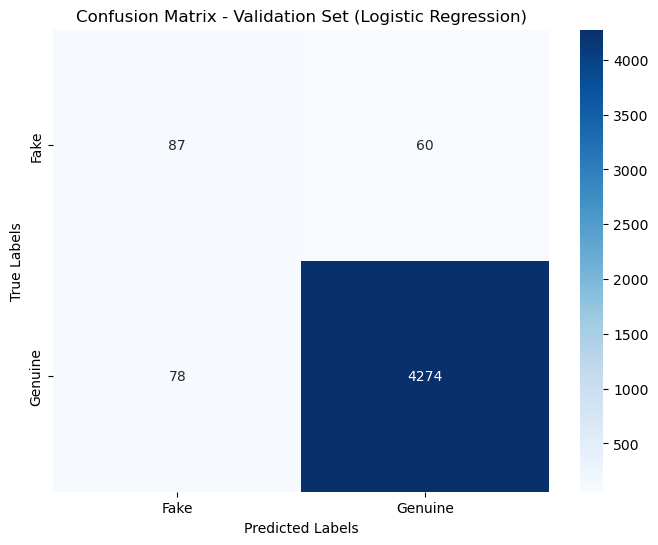

In [49]:
# Assuming you have trained a logistic regression model and made predictions on the validation set
y_val_pred_logistic = best_rf_model.predict(X_val)

# Compute the confusion matrix
conf_matrix_val_logistic = confusion_matrix(y_val, y_val_pred_logistic)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_val_logistic, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Genuine'], yticklabels=['Fake', 'Genuine'])
plt.title('Confusion Matrix - Validation Set (Logistic Regression)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [50]:
# Initialize the Support Vector Machine model
svm_model = SVC(random_state=42)

# Train the Support Vector Machine model on the training data
svm_model.fit(X_train, y_train)

# Predict labels for the validation set using SVM
y_val_pred_svm = svm_model.predict(X_val)

# Evaluate the SVM model on the validation set
accuracy_val_svm = accuracy_score(y_val, y_val_pred_svm)
classification_report_val_svm = classification_report(y_val, y_val_pred_svm)

# Print the evaluation metrics for the SVM on the validation set
print("Support Vector Machine Validation Accuracy:", accuracy_val_svm)
print("Support Vector Machine Classification Report for Validation Set:")
print(classification_report_val_svm)

# Predict labels for the test set using SVM
y_test_pred_svm = svm_model.predict(X_test)

# Evaluate the SVM model on the test set
accuracy_test_svm = accuracy_score(y_test, y_test_pred_svm)
classification_report_test_svm = classification_report(y_test, y_test_pred_svm)

# Print the evaluation metrics for the SVM on the test set
print("Support Vector Machine Test Accuracy:", accuracy_test_svm)
print("Support Vector Machine Classification Report for Test Set:")
print(classification_report_test_svm)

Support Vector Machine Validation Accuracy: 0.9724383196265837
Support Vector Machine Classification Report for Validation Set:
              precision    recall  f1-score   support

        Fake       0.57      0.62      0.59       147
     Genuine       0.99      0.98      0.99      4352

    accuracy                           0.97      4499
   macro avg       0.78      0.80      0.79      4499
weighted avg       0.97      0.97      0.97      4499

Support Vector Machine Test Accuracy: 0.9791064681040231
Support Vector Machine Classification Report for Test Set:
              precision    recall  f1-score   support

        Fake       0.56      0.61      0.59       109
     Genuine       0.99      0.99      0.99      4390

    accuracy                           0.98      4499
   macro avg       0.78      0.80      0.79      4499
weighted avg       0.98      0.98      0.98      4499



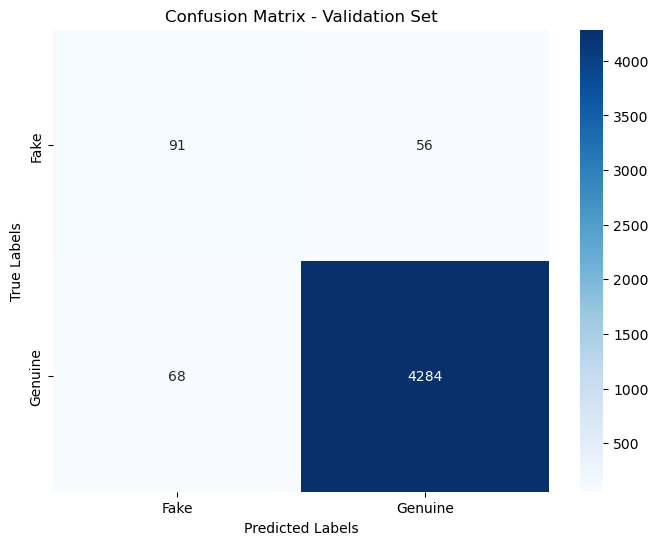

In [51]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix for validation set
conf_matrix_val = confusion_matrix(y_val, y_val_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_val, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Genuine'], yticklabels=['Fake', 'Genuine'])
plt.title('Confusion Matrix - Validation Set')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


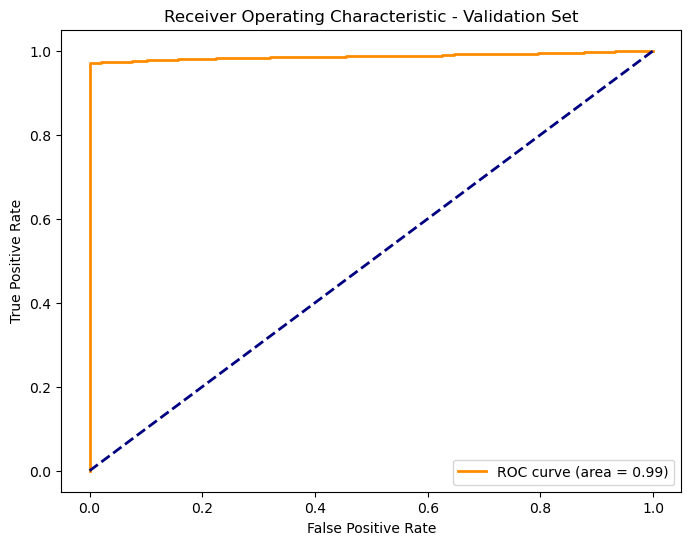

In [52]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Convert labels to binary format
y_val_binary = label_binarize(y_val, classes=['Fake', 'Genuine'])

# Compute ROC curve and ROC area for the validation set
fpr, tpr, _ = roc_curve(y_val_binary, svm_model.decision_function(X_val))
roc_auc = auc(fpr, tpr)

# Plot ROC curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Validation Set')
plt.legend(loc='lower right')
plt.show()


In [53]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree model on the training data
dt_model.fit(X_train, y_train)

# Predict labels for the validation set using Decision Tree
y_val_pred_dt = dt_model.predict(X_val)

# Evaluate the Decision Tree model on the validation set
accuracy_val_dt = accuracy_score(y_val, y_val_pred_dt)
classification_report_val_dt = classification_report(y_val, y_val_pred_dt)

# Print the evaluation metrics for the Decision Tree on the validation set
print("Decision Tree Validation Accuracy:", accuracy_val_dt)
print("Decision Tree Classification Report for Validation Set:")
print(classification_report_val_dt)

# Predict labels for the test set using Decision Tree
y_test_pred_dt = dt_model.predict(X_test)

# Evaluate the Decision Tree model on the test set
accuracy_test_dt = accuracy_score(y_test, y_test_pred_dt)
classification_report_test_dt = classification_report(y_test, y_test_pred_dt)

# Print the evaluation metrics for the Decision Tree on the test set
print("Decision Tree Test Accuracy:", accuracy_test_dt)
print("Decision Tree Classification Report for Test Set:")
print(classification_report_test_dt)

Decision Tree Validation Accuracy: 0.9693265170037786
Decision Tree Classification Report for Validation Set:
              precision    recall  f1-score   support

        Fake       0.53      0.59      0.55       147
     Genuine       0.99      0.98      0.98      4352

    accuracy                           0.97      4499
   macro avg       0.76      0.78      0.77      4499
weighted avg       0.97      0.97      0.97      4499

Decision Tree Test Accuracy: 0.9764392087130473
Decision Tree Classification Report for Test Set:
              precision    recall  f1-score   support

        Fake       0.51      0.62      0.56       109
     Genuine       0.99      0.99      0.99      4390

    accuracy                           0.98      4499
   macro avg       0.75      0.80      0.77      4499
weighted avg       0.98      0.98      0.98      4499



In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, accuracy_score, classification_report

# Define hyperparameter grid for Decision Tree
param_grid_dt = {'criterion': ['gini', 'entropy'],
                 'max_depth': [None, 10, 20, 30],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4]}

# Create Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search_dt = GridSearchCV(dt_model, param_grid_dt, cv=5, scoring=make_scorer(accuracy_score))
grid_search_dt.fit(X_train, y_train)

# Get best hyperparameters
best_params_dt = grid_search_dt.best_params_

# Initialize the Decision Tree model with the best hyperparameters
best_dt_model = DecisionTreeClassifier(random_state=42, **best_params_dt)

# Train the model on the training data
best_dt_model.fit(X_train, y_train)

# Predict labels for the validation set
y_val_pred_dt_tuned = best_dt_model.predict(X_val)

# Evaluate the model on the validation set
accuracy_val_dt_tuned = accuracy_score(y_val, y_val_pred_dt_tuned)
classification_report_val_dt_tuned = classification_report(y_val, y_val_pred_dt_tuned)

# Print the evaluation metrics
print("Best Hyperparameters for Decision Tree:", best_params_dt)
print("Decision Tree Validation Accuracy with Tuned Hyperparameters:", accuracy_val_dt_tuned)
print("Decision Tree Classification Report for Validation Set:")
print(classification_report_val_dt_tuned)

# Predict labels for the test set
y_test_pred_dt_tuned = best_dt_model.predict(X_test)

# Evaluate the model on the test set
accuracy_test_dt_tuned = accuracy_score(y_test, y_test_pred_dt_tuned)
classification_report_test_dt_tuned = classification_report(y_test, y_test_pred_dt_tuned)

# Print the evaluation metrics for the test set
print("Decision Tree Test Accuracy with Tuned Hyperparameters:", accuracy_test_dt_tuned)
print("Decision Tree Classification Report for Test Set:")
print(classification_report_test_dt_tuned)


Best Hyperparameters for Decision Tree: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
Decision Tree Validation Accuracy with Tuned Hyperparameters: 0.969104245387864
Decision Tree Classification Report for Validation Set:
              precision    recall  f1-score   support

        Fake       0.53      0.57      0.55       147
     Genuine       0.99      0.98      0.98      4352

    accuracy                           0.97      4499
   macro avg       0.76      0.78      0.77      4499
weighted avg       0.97      0.97      0.97      4499

Decision Tree Test Accuracy with Tuned Hyperparameters: 0.9764392087130473
Decision Tree Classification Report for Test Set:
              precision    recall  f1-score   support

        Fake       0.51      0.59      0.55       109
     Genuine       0.99      0.99      0.99      4390

    accuracy                           0.98      4499
   macro avg       0.75      0.79      0.77      4499
weighted av

In [54]:
from sklearn.naive_bayes import GaussianNB
# Initialize the Naive Bayes model
nb_model = GaussianNB()

# Train the model on the training data
nb_model.fit(X_train, y_train)

# Predict labels for the validation set
y_val_pred = nb_model.predict(X_val)

# Evaluate the model on the validation set
accuracy_val = accuracy_score(y_val, y_val_pred)
classification_report_val = classification_report(y_val, y_val_pred)

# Print the evaluation metrics for the validation set
print("Validation Accuracy:", accuracy_val)
print("Classification Report for Validation Set:")
print(classification_report_val)

# Predict labels for the test set
y_test_pred = nb_model.predict(X_test)

# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
classification_report_test = classification_report(y_test, y_test_pred)

# Print the evaluation metrics for the test set
print("Test Accuracy:", accuracy_test)
print("Classification Report for Test Set:")
print(classification_report_test)

Validation Accuracy: 0.9631029117581685
Classification Report for Validation Set:
              precision    recall  f1-score   support

        Fake       0.45      0.54      0.49       147
     Genuine       0.98      0.98      0.98      4352

    accuracy                           0.96      4499
   macro avg       0.72      0.76      0.74      4499
weighted avg       0.97      0.96      0.96      4499

Test Accuracy: 0.9679928873082907
Classification Report for Test Set:
              precision    recall  f1-score   support

        Fake       0.39      0.57      0.46       109
     Genuine       0.99      0.98      0.98      4390

    accuracy                           0.97      4499
   macro avg       0.69      0.77      0.72      4499
weighted avg       0.97      0.97      0.97      4499



In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer, accuracy_score, classification_report

# Define hyperparameter grid for Gaussian Naive Bayes
param_grid_nb = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}

# Create Gaussian Naive Bayes model
nb_model = GaussianNB()

# Perform grid search with cross-validation
grid_search_nb = GridSearchCV(nb_model, param_grid_nb, cv=5, scoring=make_scorer(accuracy_score))
grid_search_nb.fit(X_train, y_train)

# Get best hyperparameters
best_params_nb = grid_search_nb.best_params_

# Initialize the Gaussian Naive Bayes model with the best hyperparameters
best_nb_model = GaussianNB(var_smoothing=best_params_nb['var_smoothing'])

# Train the model on the training data
best_nb_model.fit(X_train, y_train)

# Predict labels for the validation set
y_val_pred_nb_tuned = best_nb_model.predict(X_val)

# Evaluate the model on the validation set
accuracy_val_nb_tuned = accuracy_score(y_val, y_val_pred_nb_tuned)
classification_report_val_nb_tuned = classification_report(y_val, y_val_pred_nb_tuned)

# Print the evaluation metrics
print("Best Hyperparameters for Gaussian Naive Bayes:", best_params_nb)
print("Gaussian Naive Bayes Validation Accuracy with Tuned Hyperparameters:", accuracy_val_nb_tuned)
print("Gaussian Naive Bayes Classification Report for Validation Set:")
print(classification_report_val_nb_tuned)

# Predict labels for the test set
y_test_pred_nb_tuned = best_nb_model.predict(X_test)

# Evaluate the model on the test set
accuracy_test_nb_tuned = accuracy_score(y_test, y_test_pred_nb_tuned)
classification_report_test_nb_tuned = classification_report(y_test, y_test_pred_nb_tuned)

# Print the evaluation metrics for the test set
print("Gaussian Naive Bayes Test Accuracy with Tuned Hyperparameters:", accuracy_test_nb_tuned)
print("Gaussian Naive Bayes Classification Report for Test Set:")
print(classification_report_test_nb_tuned)


Best Hyperparameters for Gaussian Naive Bayes: {'var_smoothing': 1e-09}
Gaussian Naive Bayes Validation Accuracy with Tuned Hyperparameters: 0.9631029117581685
Gaussian Naive Bayes Classification Report for Validation Set:
              precision    recall  f1-score   support

        Fake       0.45      0.54      0.49       147
     Genuine       0.98      0.98      0.98      4352

    accuracy                           0.96      4499
   macro avg       0.72      0.76      0.74      4499
weighted avg       0.97      0.96      0.96      4499

Gaussian Naive Bayes Test Accuracy with Tuned Hyperparameters: 0.9679928873082907
Gaussian Naive Bayes Classification Report for Test Set:
              precision    recall  f1-score   support

        Fake       0.39      0.57      0.46       109
     Genuine       0.99      0.98      0.98      4390

    accuracy                           0.97      4499
   macro avg       0.69      0.77      0.72      4499
weighted avg       0.97      0.97      

In [55]:
from textblob import TextBlob

# Assuming you have a new review stored in a variable called 'new_review_text'
new_review_text = "product is good and value for money.But, the packaging was worst ever received from Amazon. "

# Define a function to calculate sentiment score using TextBlob
def calculate_sentiment_score(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Calculate sentiment score for the new review
new_review_sentiment_score = calculate_sentiment_score(new_review_text)

# Define thresholds for sentiment categories
good_threshold = 0.7
bad_threshold = -0.5  # Set a specific value for the "Bad" threshold

# Categorize sentiment based on thresholds
if new_review_sentiment_score > good_threshold:
    prediction = "Good 😊"
elif new_review_sentiment_score < bad_threshold:
    prediction = "Bad ☹️"
else:
    prediction = "Moderate 🙂"

# Print the prediction
print(f"The sentiment prediction for the new review is: {prediction}")


The sentiment prediction for the new review is: Moderate 🙂
